In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
adv_2021= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2021.xlsx",'Sheet 1')
adv_2022= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2022.xlsx")


In [8]:
adv_2022.columns

Index(['index', 'Advisor name', 'Retailer Name', 'Retailer ID', 'Advisor ID',
       'Month of Order Intent Created Date', 'Advisor Phone Number',
       'Country Code ', 'Hierarchy Level 3', 'Hierarchy Level 2',
       'Hierarchy Level 1', 'Advisor Type', 'Product category',
       'Product Brand', 'Product Name', 'Unit', 'Total Order Intents',
       'Distinct count of Cancelled Order Intents', 'Farmers with Intent',
       'Farmers with multiple Intents', 'Farmers with Purchase',
       'Distinct count of Farmers with multiple purchases',
       'Farmer Conversion', 'Active Retailers', 'Volume Intent',
       'Volume Cancelled', 'Volume Purchased', 'Returned Volume',
       'Avg Volume Sold per Farmers', 'Total Intent Value',
       'Cancelled Order Value', 'Sales Value', 'Avg Sales per Farmer',
       'Actual Commission', 'Intended Commission'],
      dtype='object')

In [9]:
# Total sales revenue for 2021
total_sales_2021 = adv_2021['Sales Value'].sum()

# Total sales revenue for 2022
total_sales_2022 = adv_2022['Sales Value'].sum()

print(f"Total sales revenue for 2021: {total_sales_2021}")
print(f"Total sales revenue for 2022: {total_sales_2022}")

Total sales revenue for 2021: 1402966161.97165
Total sales revenue for 2022: 3362276288.8239317


In [10]:
# Average sales revenue per location for 2021
avg_sales_2021 = adv_2021.groupby('Hierarchy Level 3')['Sales Value'].mean()

# Average sales revenue per location for 2022
avg_sales_2022 = adv_2022.groupby('Hierarchy Level 3')['Sales Value'].mean()

print("Average sales revenue per location for 2021:")
print(avg_sales_2021)
print("\nAverage sales revenue per location for 2022:")
print(avg_sales_2022)

Average sales revenue per location for 2021:
Hierarchy Level 3
Central    13347.367203
East       29675.566429
North      26395.401325
South      19326.908685
West       12712.844581
Name: Sales Value, dtype: float64

Average sales revenue per location for 2022:
Hierarchy Level 3
Central    14376.271015
East       17673.578150
North      26189.455044
South      16996.718995
West       11341.957071
Name: Sales Value, dtype: float64


In [11]:
# Percentage change in sales revenue
sales_change = (total_sales_2022 - total_sales_2021) / total_sales_2021 * 100

print(f"Percentage change in sales revenue from 2021 to 2022: {sales_change:.2f}%")

Percentage change in sales revenue from 2021 to 2022: 139.65%


In [12]:
# Merge the two data frames on Location
merged_sales = pd.merge(adv_2021, adv_2022, on='Hierarchy Level 3', suffixes=('_2021', '_2022'))

MemoryError: Unable to allocate 17.6 GiB for an array with shape (2363942994,) and data type int64

In [8]:
# Total sales revenue for 2021 by level and location
sales_2021_by_level = adv_2021.groupby(['Hierarchy Level 3', 'Product category'])['Sales Value'].sum().reset_index()

# Total sales revenue for 2022 by level and location
sales_2022_by_level = adv_2022.groupby(['Hierarchy Level 3', 'Product category'])['Sales Value'].sum().reset_index()

# Total sales revenue for merged data by level and location
merged_sales_by_level = merged_sales.groupby(['Hierarchy Level 3', 'Product category'])[['Revenue_2021', 'Revenue_2022']].sum().reset_index()

NameError: name 'merged_sales' is not defined

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set the x-axis labels
x_labels = np.unique(sales_2021_by_level['Level'])

# Set the bar width
bar_width = 0.35

# Create subplots for each location
for location in np.unique(sales_2021_by_level['Location']):
    # Get the sales data for the location
    sales_2021_loc = sales_2021_by_level[sales_2021_by_level['Location'] == location]['Revenue']
    sales_2022_loc = sales_2022_by_level[sales_2022_by_level['Location'] == location]['Revenue']
    merged_sales_2021_loc = merged_sales_by_level[(merged_sales_by_level['Location'] == location) & (merged_sales_by_level['Revenue_2021'] > 0)]['Revenue_2021']
    merged_sales_2022_loc = merged_sales_by_level[(merged_sales_by_level['Location'] == location) & (merged_sales_by_level['Revenue_2022'] > 0)]['Revenue_2022']
    
    # Set the x-axis values
    x_values = np.arange(len(x_labels))
    
    # Create the bar plots
    fig, ax = plt.subplots()
    ax.bar(x_values - bar_width/2, sales_2021_loc, width=bar_width, label='2021')
    ax.bar(x_values + bar_width/2, sales_2022_loc, width=bar_width, label='2022')
    ax.bar(x_values, merged_sales_2021_loc, width=bar_width/2, alpha=0.5, label='2021 merged')
    ax.bar(x_values + bar_width/2, merged_sales_2022_loc, width=bar_width/2, alpha=0.5, label='2022 merged')

    # Set the plot title and axis labels
    ax.set_title(f"Sales Revenue for {location}")
    ax.set_xlabel("Level")
    ax.set_ylabel("Revenue")
    
    # Set the x-axis tick labels
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_labels)
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()

KeyError: 'Level'

In [10]:
# Optimize the data types of the columns
adv_2021['Total Order Intents'] = adv_2021['Total Order Intents'].astype('int32')
adv_2021['Sales Value'] = adv_2021['Sales Value'].astype('float32')
adv_2021['Actual Commission'] = adv_2021['Actual Commission'].astype('float32')
adv_2021['Intended Commission'] = adv_2021['Intended Commission'].astype('float32')

# Check the memory usage of the data frame again
adv_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68447 entries, 0 to 68446
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              68447 non-null  object 
 1   Advisor name                                       68447 non-null  object 
 2   Retailer Name                                      47304 non-null  object 
 3   Retailer ID                                        47304 non-null  object 
 4   Advisor ID                                         68447 non-null  object 
 5   Month of Order Intent Created Date                 68447 non-null  object 
 6   Advisor Phone Number                               68447 non-null  int64  
 7   Country Code                                       68447 non-null  object 
 8   Hierarchy Level 3                                  62853 non-null  object 
 9   Hierar

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


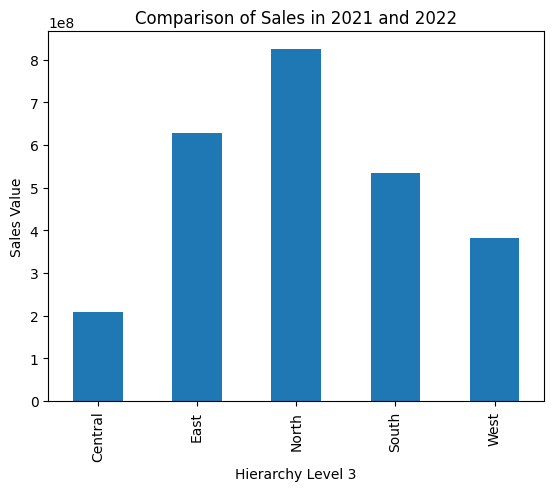

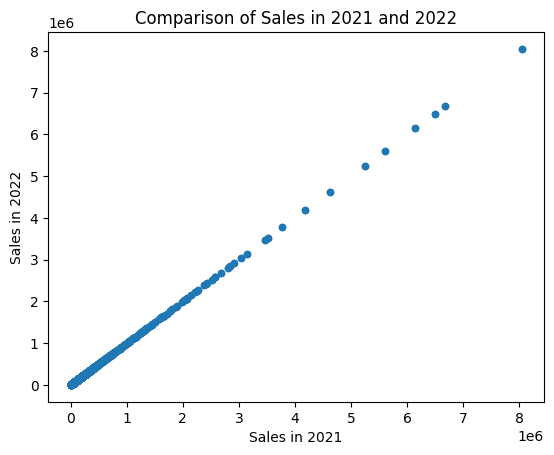

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read only the columns needed from each data frame
cols_to_use = ['Hierarchy Level 3', 'Product category', 'Sales Value']
adv_2021= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2021.xlsx",'Sheet 1', usecols=cols_to_use, dtype={'Sales': float})
adv_2022= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2021.xlsx", usecols=cols_to_use, dtype={'Sales': float})



# Use pd.concat() to combine the data frames
df_merged = pd.concat([adv_2021, adv_2022], ignore_index=True)

# Plot a bar chart to compare the total sales in 2021 and 2022
df_merged.groupby('Hierarchy Level 3')['Sales Value'].sum().plot(kind='bar')
plt.title('Comparison of Sales in 2021 and 2022')
plt.xlabel('Hierarchy Level 3')
plt.ylabel('Sales Value')
plt.show()

df_merged.plot(kind='scatter', x='Sales Value', y='Sales Value')
plt.title('Comparison of Sales in 2021 and 2022')
plt.xlabel('Sales in 2021')
plt.ylabel('Sales in 2022')
plt.show()

In [1]:
df_merged.columns

NameError: name 'df_merged' is not defined

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
adv_2021= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2021.xlsx",'Sheet 1')
adv_2022= pd.read_excel("C:/Users/EFRNV/Downloads/Advisor analasis Norman_req_India/India Advisor Details 2022.xlsx")


In [15]:
adv_2021['Year'] = 2021
adv_2022['Year'] = 2022


In [16]:
adv_2021 = adv_2021.apply(lambda x: pd.to_numeric(x, errors='coerce'))
adv_2022 = adv_2022.apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [17]:
df = pd.concat([adv_2021, adv_2022], ignore_index=True)
df.head()

,index,Advisor name,Retailer Name,Retailer ID,Advisor ID,Month of Order Intent Created Date,Advisor Phone Number,Country Code,Hierarchy Level 3,Hierarchy Level 2,...,Volume Purchased,Returned Volume,Avg Volume Sold per Farmers,Total Intent Value,Cancelled Order Value,Sales Value,Avg Sales per Farmer,Actual Commission,Intended Commission,Year
0,219.0,NaN,NaN,NaN,NaN,NaN,8499901890,NaN,NaN,NaN,...,0.0,0.0,0.000000,26210.0,0.0,0.0,NaN,0.00,853.9,2021
1,221.0,NaN,NaN,NaN,NaN,NaN,8499901890,NaN,NaN,NaN,...,12.8,0.0,2.560000,186550.0,0.0,183680.0,36736.000000,14918.40,15151.5,2021
2,222.0,NaN,NaN,NaN,NaN,NaN,8499901890,NaN,NaN,NaN,...,73.0,0.0,24.333333,52100.0,0.0,76066.0,25355.333333,2478.35,1697.5,2021
3,223.0,NaN,NaN,NaN,NaN,NaN,8499901890,NaN,NaN,NaN,...,10.0,0.0,5.000000,5370.0,0.0,10740.0,5370.000000,349.80,174.9,2021
4,224.0,NaN,NaN,NaN,NaN,NaN,8499901890,NaN,NaN,NaN,...,54.0,0.0,27.000000,104900.0,0.0,113292.0,56646.000000,3766.50,3487.5,2021


In [18]:
df.dtypes

index                                                float64
Advisor name                                         float64
Retailer Name                                        float64
Retailer ID                                          float64
Advisor ID                                           float64
Month of Order Intent Created Date                   float64
Advisor Phone Number                                   int64
Country Code                                         float64
Hierarchy Level 3                                    float64
Hierarchy Level 2                                    float64
Hierarchy Level 1                                    float64
Advisor Type                                         float64
Product category                                     float64
Product Brand                                        float64
Product Name                                         float64
Unit                                                 float64
Total Order Intents     

In [19]:
df.isnull().sum()

index                                                249120
Advisor name                                         251118
Retailer Name                                        251115
Retailer ID                                          251118
Advisor ID                                           251118
Month of Order Intent Created Date                   251118
Advisor Phone Number                                      0
Country Code                                         251118
Hierarchy Level 3                                    251118
Hierarchy Level 2                                    251118
Hierarchy Level 1                                    251118
Advisor Type                                         251118
Product category                                     251118
Product Brand                                        251118
Product Name                                         251118
Unit                                                 250628
Total Order Intents                     

[nan]
[     0. 183680.  76066. ...  80388. 380256.  62608.]
[2021]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

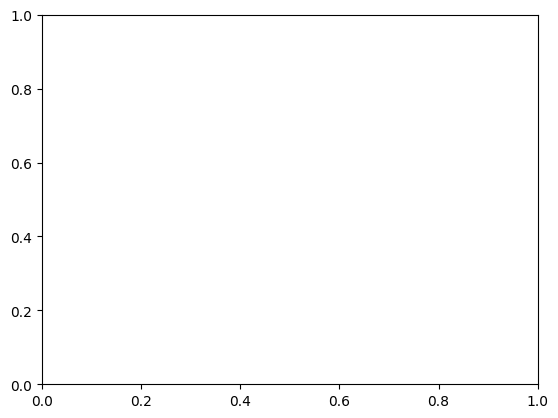

In [20]:
# print the unique values of each column
print(adv_2021['Month of Order Intent Created Date'].unique())
print(adv_2021['Sales Value'].unique())
print(adv_2021['Year'].unique())

# try specifying a different color palette
sns.set_palette('pastel')
sns.barplot(x='Month of Order Intent Created Date', y='Sales Value', hue='Year', data=adv_2021)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using Seaborn
sns.barplot(x='Month of Order Intent Created Date', y='Sales Value', hue='Year', data=adv_2021, palette='husl')

# Set the plot title and axes labels
plt.title('Monthly Sales in 2021')
plt.xlabel('Month of Order Intent Created Date')
plt.ylabel('Sales Value')

# Display the plot
plt.show()


In [ ]:
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [ ]:
df_diff = adv_2022.subtract(adv_2021, fill_value=0)
df_diff

In [ ]:
df = df.dropna(subset=['Month of Order Intent Created Date'])
df['Year'] = pd.DatetimeIndex(df['Month of Order Intent Created Date']).year
sns.barplot(x='Month of Order Intent Created Date', y='Sales Value', hue='Year', data=df, palette='husl')


In [ ]:
sns.barplot(x='Month of Order Intent Created Date', y='Sales Value', hue='Year', data=df[df['Sales Value'].notnull()], palette='husl')


In [ ]:
sns.lineplot(x='Month of Order Intent Created Date', y='Sales Value', hue='Year', data=df)

In [ ]:
# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(18, 15))

# Generate the heatmap with annotations
sns.heatmap(df.corr(), annot=True, ax=ax)

# Show the plot
plt.show()

In [ ]:
adv_2022.head()


In [ ]:
adv_2022.describe()


In [ ]:
adv_2022.nunique()


In [ ]:
adv_2022.info()


In [ ]:
print("Is there any missing data?")
print(adv_2022.isna().sum())

In [ ]:
# Group the data frame by 'month' and 'category' and sum the 'sales' column:

#grouped = adv_2022.groupby(['Month of Order Intent Created Date', 'Product category','Product Brand','Product Name']).sum().reset_index()
#grouped = adv_2022.groupby(['Month of Order Intent Created Date', 'Product category','Product Brand']).sum().reset_index()
grouped = adv_2022.groupby(['Month of Order Intent Created Date', 'Product category']).sum().reset_index()


In [ ]:
# Use pivot() function to create a pivot table with 'month' as the index and 'category' as the columns:

#pivot_table = grouped.pivot(index='Month of Order Intent Created Date', columns=['Product category','Product Brand','Product Name'], values='Sales Value')
#pivot_table = grouped.pivot(index='Month of Order Intent Created Date', columns=['Product category','Product Brand'], values='Sales Value')
pivot_table = grouped.pivot(index='Month of Order Intent Created Date', columns='Product category', values='Sales Value')


In [ ]:
# Define your pivot table first
pivot_table = pd.pivot_table(grouped, values='Sales Value', index='Month of Order Intent Created Date', columns='Product category', aggfunc=sum)
# Convert index to DateTimeIndex
#pivot_table.index = pd.to_datetime(pivot_table.index)

# Sort index in ascending order
pivot_table = pivot_table.sort_index()

# Calculate sales values and sales values in millions
sales_values = pivot_table.sum(axis=1)
sales_values_millions = [value / 1000000 for value in sales_values]

# Plot the pivot table and add labels
#plt.figure(figsize=(30, 20)) # Set the figure size here
fig, ax = plt.subplots(figsize=(15, 10))
pivot_table.plot(kind='line', ax=ax)
ax.set_xlabel('Month of Order Intent Created Date')
ax.set_ylabel('Sales Value')
ax.set_title('Sales patterns by Product category')
plt.xticks(rotation=90)

# Add labels to the plot
for i, value in enumerate(sales_values_millions):
    ax.text(i, sales_values[i]+0.005*max(sales_values), f'{value:.2f}M', ha='center', va='bottom')

# Set y-axis limits
ax.set_ylim([0, max(sales_values)*1.1])

plt.show()

In [ ]:
plt.figure(figsize = (4,6))
grouped = adv_2022.groupby(['Product category', 'Sales Value']).sum().reset_index()

plt.pie(grouped["Product category"].value_counts(), labels = grouped["Product category"].value_counts().index, autopct='%1.1f%%', colors = ["lightgreen","skyblue", "lightpink", "#CC7DFF"])
plt.title("category Percentage")

plt.show()

In [ ]:
plt.figure(figsize = (6,6))
grouped = adv_2022.groupby(['Month of Order Intent Created Date', 'Sales Value']).sum().reset_index()

plt.pie(grouped["Month of Order Intent Created Date"].value_counts(), labels = grouped["Month of Order Intent Created Date"].value_counts().index, autopct='%1.1f%%', colors = ["lightgreen","skyblue", "lightpink", "#CC7DFF"])
plt.title("Monthly Percentage")

plt.show()

In [ ]:

grouped = adv_2022.groupby(['Month of Order Intent Created Date', 'Product category']).sum().reset_index()

# Define your pivot table first
pivot_table = pd.pivot_table(grouped, values='Sales Value', index='Product category', columns='Month of Order Intent Created Date', aggfunc=sum)
# Convert index to DateTimeIndex
#pivot_table.index = pd.to_datetime(pivot_table.index)

# Sort index in ascending order
pivot_table = pivot_table.sort_index()

# Calculate sales values and sales values in millions
sales_values = pivot_table.sum(axis=1)
sales_values_millions = [value / 1000000 for value in sales_values]

# Plot the pivot table and add labels
#plt.figure(figsize=(30, 20)) # Set the figure size here
fig, ax = plt.subplots(figsize=(15, 10))
pivot_table.plot(kind='line', ax=ax)
ax.set_xlabel('Product category')
ax.set_ylabel('Sales Value')
ax.set_title('Sales patterns by month')
#plt.xticks(rotation=90)

# Add labels to the plot
for i, value in enumerate(sales_values_millions):
    ax.text(i, sales_values[i]+0.005*max(sales_values), f'{value:.2f}M', ha='center', va='bottom')

# Set y-axis limits
ax.set_ylim([0, max(sales_values)*1.1])

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# group the data by the values in column1 and column2, and sum the values in column3
grouped_data = adv_2022.groupby(['Hierarchy Level 3', 'Product category'])['Sales Value'].sum()

# convert the grouped data to a dataframe
grouped_data_df = grouped_data.reset_index()

# extract column1, column2, and sales_value from the dataframe
column1 = grouped_data_df['Hierarchy Level 3']
column2 = grouped_data_df['Product category']
sales_value = grouped_data_df['Sales Value']

# create a list of unique values in column1
unique_vals = column1.unique()

# create a colormap that maps each unique value to a different color
num_unique_vals = len(unique_vals)
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, num_unique_vals))

# create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 15))

# plot sales_value against column1 and column2, using the colormap to set the colors
for i, val in enumerate(unique_vals):
    mask = (column1 == val)
    ax.scatter(column2[mask], sales_value[mask], s=100, alpha=0.5, label=val, color=colors[i])

# add text labels for the sales value sums
for i, txt in enumerate(sales_value):
    ax.text(column2[i], sales_value[i], f'{txt/1000000:.2f}M', ha='center', va='center', color='red')

# set x and y axis labels
ax.set_xlabel('Product category')
ax.set_ylabel('Sales Value (USD millions)')

# add a legend
ax.legend(title='Hierarchy Level 3', loc='upper left')

# display the plot
plt.show()


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def millions_formatter(x, pos):
return f"${x/1000000:.1f}M"

plt.figure(figsize=(15,6))
sns.countplot(data=adv_2022, x="Hierarchy Level 3", y="Sales Value", hue="Product category", palette="pastel")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter)) 

plt.xlabel("Hierarchy Level 3")
plt.ylabel("Sales Value (in millions)")
plt.title("Count of Sales Values by Hierarchy Level 3 and Product Category")
plt.show()




In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

grouped_data = adv_2022.groupby(['Hierarchy Level 3', 'Product category'])['Sales Value'].sum().reset_index()
sorted_data = grouped_data.sort_values(['Hierarchy Level 3', 'Product category'], ascending=True)

# Define function to format y-axis tick labels as millions
def millions_formatter(x, pos):
    return f"${x/1000000:.1f}M"

# Create the bar plot with Sales Value as y-axis, Hierarchy Level 3 as x-axis, and Product category as hue
plt.figure(figsize=(15,10))
sns.barplot(data=sorted_data, x="Hierarchy Level 3", y="Sales Value", hue="Product category", palette="pastel", estimator=sum)

# Add labels for the total Sales Values above each bar
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '${:.1f}M'.format(p.get_height()/1000000), 
            fontsize=10, color='black', ha='center', va='bottom')

# Format y-axis tick labels as millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Set axis labels and title
plt.xlabel("Hierarchy Level 3")
plt.ylabel("Sales Value (in millions)")
plt.title("Sum of Sales Values by Hierarchy Level 3 and Product Category")

plt.show()


In [ ]:
plt.figure(figsize = (4,6))
grouped = adv_2022.groupby(['Hierarchy Level 3', 'Sales Value']).sum().reset_index()

plt.pie(grouped["Hierarchy Level 3"].value_counts(), labels = grouped["Hierarchy Level 3"].value_counts().index, autopct='%1.1f%%', colors = ["lightgreen","skyblue", "lightpink", "#CC7DFF"])
plt.title("CU level Percentage of sales")

plt.show()

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

grouped_data = adv_2022.groupby(['Hierarchy Level 2', 'Product category'])['Sales Value'].sum().reset_index()
sorted_data = grouped_data.sort_values(['Hierarchy Level 2', 'Product category'], ascending=True)
# Define function to format y-axis tick labels as millions
def millions_formatter(x, pos):
    return f"${x/1000000:.1f}M"

# Create the bar plot with Sales Value as y-axis, Hierarchy Level 3 as x-axis, and Product category as hue
plt.figure(figsize=(20,13))
sns.barplot(data=sorted_data, x="Hierarchy Level 2", y="Sales Value", hue="Product category", palette="pastel", estimator=sum, width=0.8)

# Add labels for the total Sales Values above each bar
##ax = plt.gca()
##for p in ax.patches:
##    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '${:.1f}M'.format(p.get_height()/1000000), 
          ##  fontsize=10, color='black', ha='center', va='bottom')

# Format y-axis tick labels as millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Set axis labels and title
plt.xlabel("Hierarchy Level 2")
plt.ylabel("Sales Value (in millions)")
plt.title("Sum of Sales Values by Hierarchy Level 2 and Product Category")
plt.xticks(rotation=90)

plt.show()


In [ ]:
plt.figure(figsize = (13,13))
grouped = adv_2022.groupby(['Hierarchy Level 2', 'Sales Value']).sum().reset_index()
sorted_data = grouped_data.sort_values('Hierarchy Level 2', ascending=True)

plt.pie(sorted_data["Hierarchy Level 2"].value_counts(), labels = grouped["Hierarchy Level 2"].value_counts().index, autopct='%1.1f%%', colors = ["lightgreen","skyblue", "lightpink", "#CC7DFF"])
plt.title("CA level Percentage of sales")

plt.show()

In [ ]:
grouped

In [ ]:
sns.boxplot(y=adv_2022['Sales Value'])
plt.show()

In [ ]:
sns.boxplot(x=adv_2022['Hierarchy Level 3'], y=adv_2022['Sales Value'])
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x=adv_2021['Product category'], y=adv_2021['Sales Value'])
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
ax=sns.barplot(x='Product category',y='Sales Value', hue="Hierarchy Level 3" , data=adv_2022)

In [ ]:
df_by_country=adv_2022.groupby(['Hierarchy Level 3','Product category'])['Sales Value'].sum().reset_index()
df_by_country

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)
ax=sns.barplot(x='Hierarchy Level 2',y='Sales Value', hue="Product category" , data=adv_2022)

In [ ]:
corr=adv_2022.corr()
figure(figsize=(13, 10), dpi=80)
sns.heatmap(corr, cmap="coolwarm")

In [ ]:
adv_2022.corr()['Sales Value']

In [ ]:
adv_2022['Farmer Conversion'].corr(adv_2022['Active Retailers']) 

In [ ]:
adv_2022['Total Intent Value'].corr(adv_2022['Intended Commission']) 

In [ ]:
adv_2022['Distinct count of Farmers with multiple purchases'].corr(adv_2022['Farmers with multiple Intents']) 


In [ ]:
adv_2022['Total Order Intents'].corr(adv_2022['Farmers with Intent']) 

In [ ]:
results = adv_2022.groupby('Product category').sum().sort_values(by='Sales Value',ascending=True)
categories = results.index.tolist()
font1 = {'color':'#676767','size':11,'weight':'bold'}
font2 = {'color':'#919093','size':9,'weight':'bold'}

fig,ax = plt.subplots(figsize=(6,4))
bars = ax.barh(categories,results['Sales Value'],zorder=2,color='#CEB992')

ax.grid(color='#CACACA', linestyle='--', linewidth=0.5)
ax.set_title('Sales by Category',fontdict = font, loc = 'left')
ax.set_ylabel('', fontdict = font2)
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_facecolor('#F2F2F2')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,_: '{:,.0f}M'.format(x/1000000)))

plt.show()

In [ ]:
# Create a pivot of HL3 and Product Type
resultspivot = adv_2022.groupby(["Hierarchy Level 3","Product category"]).sum()
pivot = resultspivot.groupby(["Hierarchy Level 3","Product category"])["Sales Value"].sum().unstack().fillna(0)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
pivot

In [ ]:
# Graph the pivot table
ax = pivot.plot.bar(stacked=True, color=['#5B867F','#84DCCF','#CEB234','#CEB992','#CEB552'], width=0.8, figsize=(8, 4), zorder=2)

font3 = {'color':'#474747','size':6,'weight':'bold'}

ax.set_facecolor('#F2F2F2')
ax.set_title("Product Sales by caregory", fontdict = font, loc='left')
ax.set_xlabel('', fontdict = font3)
ax.set_ylabel('', fontdict = font3)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(prop={'size':8})
ax.grid(color='#CACACA', linestyle='--', linewidth=0.5)

# Use FuncFormatter to add commas to x-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

plt.show()

# What is the historical trend of sales?

In [ ]:
ts=data.groupby(["date",'invoice_date'])["price"].sum().sort_index()
ts = ts.droplevel(level=0)
rolling_avg = ts.rolling(window=20).mean()
font5 = {'color':'#474747','size':10,'weight':'bold'}

ts.astype('float')
plt.figure(figsize=(15,8))
plt.gca().set_xlabel(None)
plt.title('Historical Sales', fontdict = font5, loc='left')

# Use FuncFormatter to add commas to x-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

plt.gca().set_facecolor('#F2F2F2')
plt.gca().grid(color='#CACACA', linestyle='--', linewidth=0.5)

ts.plot(label='Sales', color = '#6BA7DF', linewidth=2, zorder=2) 
rolling_avg.plot(label='20-Day Rolling Average', linewidth=2, color = '#FE9E00') 
plt.grid(True, color='#CACACA', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# What is the distribution of sales by product type ?


In [ ]:
What is the distribution of sales by product type and payment method?
# Create a pivot of Payment Type and Product Type
paymentpivot = data.groupby(["category","payment_method"]).sum()
paymentpivot2 = paymentpivot.groupby(["category","payment_method"])["price"].sum().unstack().fillna(0)
paymentpivot2 = paymentpivot2.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
paymentpivot2

In [ ]:
# Graph the pivot table
ax = paymentpivot2.plot.bar(color=['#73937E','#CEB992','#585563'], width=0.7, figsize=(9, 5), zorder=2)


ax.set_facecolor('#F2F2F2')
ax.set_title("Sales by Product Type and Payment Method", fontdict = font, loc='left')
ax.set_xlabel('', fontdict = font3)
ax.set_ylabel('', fontdict = font3)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(prop={'size':8})
ax.grid(color='#CACACA', linestyle='--', linewidth=0.5)

# Use FuncFormatter to add commas to y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

plt.show()

In [ ]:
df['shopping_mall'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='The most visited shopping malls')
plt.show()

In [ ]:
df['shopping_mall'].value_counts()

In [ ]:
df['gender'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='Gender distribution')
plt.show()

In [ ]:
df['age'].value_counts()

# Distribution by

In [ ]:
def age_group_(x):
    if x <= 20 :
        x= '18-20yo'
    elif x >20 and x <=30:
        x= '21-30yo'
    elif x >30 and x <=40:
        x= '31-40yo'
    elif x >40 and x <=50:
        x= '41-50yo'
    elif x >50 and x <=60:
        x= '51-60yo'
    else:
        x= '61yo+'
    return x

In [ ]:
df['age_group']=df['age'].apply(age_group_)

In [ ]:
df.groupby('age_group')['gender'].agg(['count'])

# Distribution of the average product price

In [ ]:
df.groupby('category')['price'].agg(['mean','sum']).sort_values(by='mean',ascending=False)

In [ ]:
fig = px.box(df, x='category', color='category', y='price', title='Distribution of the average product price', width=1200, height=600 ,template='plotly_dark')
fig.show()

In [ ]:
plt.subplots(figsize=(18,10))
plt.xticks(rotation=90)
sns.stripplot(y='category', x='price', data=df, palette='Pastel1', s=15, marker='o', linewidth=1, alpha=0.1).set(title='Distribution of the average product price')
plt.show()

In [ ]:
fig = px.histogram(df, x='age', y='price', color='shopping_mall',barmode='relative',marginal='box', title='Distribution of the price of goods in shopping centers and the costs of buyers', width=1200, height=600 ,template='plotly_dark')
fig.show()

In [ ]:
df['price'] = df['price'].astype(int)

In [ ]:
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import style

# Distribution price by date

In [ ]:
df['invoice_date']= pd.to_datetime(df['invoice_date'])

In [ ]:
df.index = df.invoice_date

In [ ]:
plt.figure(figsize=(20,10))
df.resample('M').customer_id.nunique().plot()
plt.show()

In [ ]:
plt.figure(figsize=(18,10))
df.resample('D').customer_id.nunique().rolling(10).mean().plot()
plt.show()

In [ ]:
plt.figure(figsize=(18,10))
df.resample('M').price.mean().plot()
plt.show()

In [ ]:
fig = px.histogram(df, x='invoice_date', y='price', color='gender',barmode='relative',marginal='box', title='Distribution of the price of goods in shopping centers and the costs of buyers', width=1200, height=600 ,template='plotly_dark')
fig.show()

In [ ]:
## We Will do Age Range Column To help us In Analysis
cut_labels_4 = ['10-20', '21-30', '31-50', '51-70']
cut_bins = [0,20, 30, 50, 71]
df["Age_Range"] =pd.cut(df.Age,
                            bins=cut_bins, 
                         labels=cut_labels_4)

In [ ]:
#Average Total Payment For Both Genders
df.groupby('Gender')['Total_payment'].describe()

In [ ]:
#The Correlation Age & Bill Price
df[['Age','Total_payment']].corr()

In [ ]:
px.imshow(df[['Age','Total_payment']].corr(),text_auto=True , color_continuous_scale= 'redor')

In [ ]:
#Average Price for each category
px.box(df , y= 'Price', color='Category')

In [ ]:
#Performance of Malls across years
df5 =df.groupby(['MonthNo','Month','Shopping_mall','Year'])['Total_payment'].sum().reset_index()
df5

In [ ]:
px.bar(df5 , x='Year' , y='Total_payment' , 
       color='Shopping_mall'
      ,barmode='group')